In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kcm import *  

In [2]:
probs = np.array([]) #np.arange(0.2, .8, 0.2)
 
for prob in probs:
    print("Probability: {}".format(prob))
    east_kcm = EastKCM(prob, 50, 200, 50000)
    trajectory = east_kcm.gen_trajectory()
    draw_trajectory(trajectory)

Softening parameter: 0.00019
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8646904280245551, 0.3934981498094714)
(array([1, 0]), 0.6321904492825768, 0.2212362090872203)
(array([0, 1]), 0.6321904492825768, 0.2212362090872203)
(array([0, 0]), 0.00018998195114305894, 4.7498871892814876e-05)
Critical biasing field: 0.219404612755
Probability swap: 0.632113201416


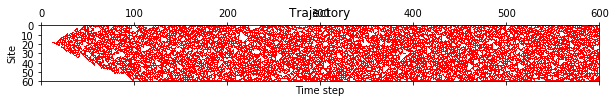

Softening parameter: 0.0063
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8655146489502406, 0.39442387418365055)
(array([1, 0]), 0.6344309140475033, 0.22242486271251383)
(array([0, 1]), 0.6344309140475033, 0.22242486271251383)
(array([0, 0]), 0.006280196608945299, 0.0015737603384077259)
Critical biasing field: 0.221697686353
Probability swap: 0.632113201416


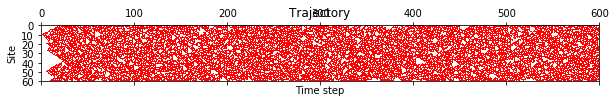

Softening parameter: 0.019
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8672118131049509, 0.3963435293179818)
(array([1, 0]), 0.6390442845291644, 0.2248897486962701)
(array([0, 1]), 0.6390442845291644, 0.2248897486962701)
(array([0, 0]), 0.018820637757194003, 0.004738736590788162)
Critical biasing field: 0.226395835899
Probability swap: 0.632113201416


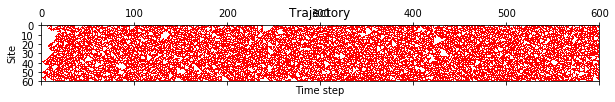

In [3]:
softening_params = np.array([1.9e-4, 6.3e-3,1.9e-2])

for softening_param in softening_params:
    print("Softening parameter: {}".format(softening_param))
    fa_kcm = SoftenedFA(inactivation_ratio=.25, biasing_field=0.0001, softening_param=softening_param, num_burnin_steps=0, num_sites=60, num_steps=600)
    trajectory = fa_kcm.gen_trajectory(init_state=np.zeros(60))
    draw_trajectory(trajectory)

Temperature: 1.0
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8655146489502406, 0.39442387418365055)
(array([1, 0]), 0.6344309140475033, 0.22242486271251383)
(array([0, 1]), 0.6344309140475033, 0.22242486271251383)
(array([0, 0]), 0.006280196608945299, 0.0015737603384077259)
Critical biasing field: 0.221697686353
Probability swap: 0.616677550478


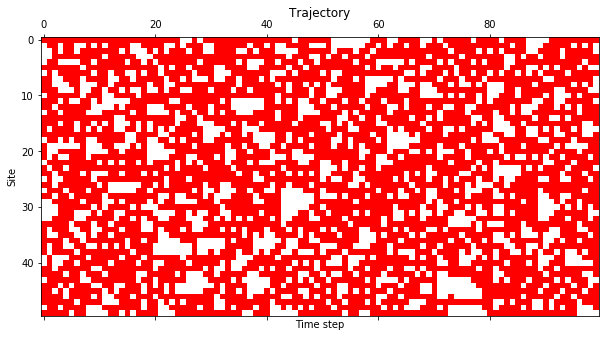

Temperature: 10.0
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8655146489502406, 0.8256317078565574)
(array([1, 0]), 0.6344309140475033, 0.5835692225735531)
(array([0, 1]), 0.6344309140475033, 0.5835692225735531)
(array([0, 0]), 0.006280196608945299, 0.005469456308393128)
Critical biasing field: 0.849773968476
Probability swap: 0.492473498353


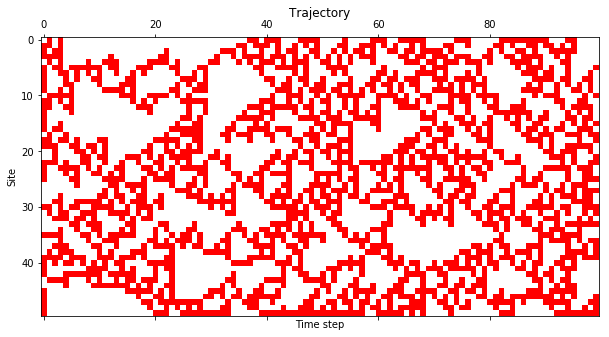

Temperature: 100.0
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8655146489502406, 0.8617482077769506)
(array([1, 0]), 0.6344309140475033, 0.6293310639908687)
(array([0, 1]), 0.6344309140475033, 0.6293310639908687)
(array([0, 0]), 0.006280196608945299, 0.006194003615709653)
Critical biasing field: 1.03156892535
Probability swap: 0.451095972311


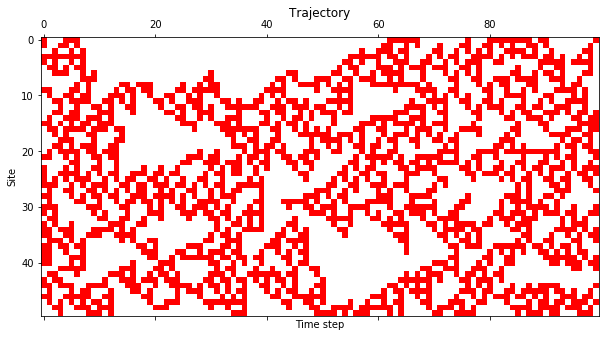

Temperature: 1000.0
Neighboring spins; Probability activation; Probability inactivation
(array([1, 1]), 0.8655146489502406, 0.8651403410500966)
(array([1, 0]), 0.6344309140475033, 0.6339209328682874)
(array([0, 1]), 0.6344309140475033, 0.6339209328682874)
(array([0, 0]), 0.006280196608945299, 0.006271523778601629)
Critical biasing field: 1.05359659031
Probability swap: 0.446102953547


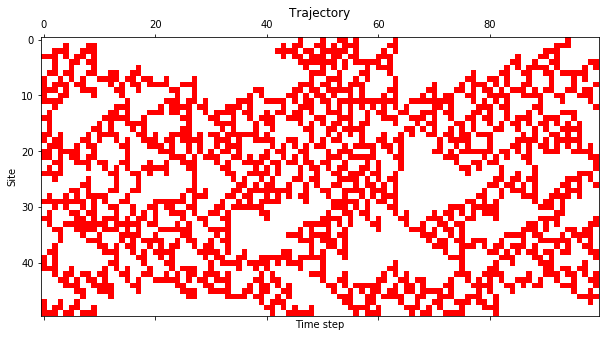

In [4]:
temperatures = np.array([1., 10, 100, 1000])

for temperature in temperatures:
    print("Temperature: {}".format(temperature))
    fa_kcm = SoftenedFA(temperature=temperature,  coupling_energy=np.log(4), softening_param=6.3e-3, num_burnin_steps=0)
    trajectory = fa_kcm.gen_trajectory()
    draw_trajectory(trajectory)